# Assignment03
* 2019220177 Seungwook Oh

## Initial Setting

### Mount Google Drive

In [1]:
from google.colab import drive
from os.path import join
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd /content/drive/My\ Drive/MIMP

/content/drive/My Drive/MIMP


### git Setting

In [3]:
!git status
!git checkout develop
!git branch

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   assignment02.ipynb
	modified:   colab_git_init.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	Assignment03.ipynb
	data.csv

no changes added to commit (use "git add" and/or "git commit -a")
M	assignment02.ipynb
M	colab_git_init.ipynb
Switched to branch 'develop'
* develop
  master


In [0]:
!git config --global user.email "sooonchang@gmail.com"
!git config --global user.name "SooonChang"

In [5]:
!git add .
!git commit -m "Assignment03 Init"

[develop 3987163] Assignment03 Init
 4 files changed, 203 insertions(+), 2 deletions(-)
 create mode 100644 Assignment03.ipynb
 rewrite assignment02.ipynb (94%)
 rewrite colab_git_init.ipynb (96%)
 create mode 100644 data.csv


In [6]:
!git push origin develop

Counting objects: 6, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 4.35 KiB | 494.00 KiB/s, done.
Total 6 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/SooonChang/MIMP
   7e7a804..3987163  develop -> develop


## 1. Input Points
* plot a set of points ${(x^{(i)} , y^{(i)})}$ that are loaded from 'data.csv' (in black color)

### Import libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

### load Data

In [0]:
path = "data.csv"
data = np.genfromtxt(path, delimiter=',')
x_data = data[:,0]
y_data = data[:,1]

### plot data points

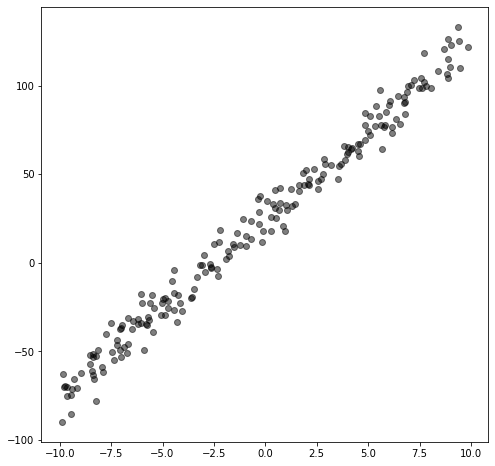

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(x_data,y_data, alpha = 0.5, c = 'black')
plt.show()

### git commit

In [10]:
!git add .
!git commit -m "Assignment03 : 1. Input Points"
!git push origin develop

[develop 237e015] Assignment03 : 1. Input Points
 1 file changed, 1 insertion(+), 1 deletion(-)
Counting objects: 3, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 19.91 KiB | 3.98 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/SooonChang/MIMP
   3987163..237e015  develop -> develop


## 2. Linear regression results
* plot a set of points ${(x^{(i)} , y^{(i)})}$ that are loaded from 'data.csv' file (in black color)
* plot a straight line obtained by the optimal linear regression based on the given set of points (in red color)
* the estimated straight line (linear function) is superimposed on the set of points

### Define Linear Regression Model


In [0]:
class LinearRegression:

  def __init__(self, eta = 0.05, n_iterations = 100):
    self.eta = eta
    self.n_iterations = n_iterations
  
  def fit(self,x,y): ## fit model
    self.cost_ = []
    self.w0_ = []
    self.w1_ = []
    self.w0 = -30.0  ## For step4, I initiated w0,w1  to -30
    self.w1 = -30.0

    m = x.shape[0]

    for i in range(self.n_iterations):
      h = self.w0 + self.w1 * x
      residuals = h - y

      cost = np.sum((residuals**2))
      cost = cost/(2*m)
      self.cost_.append(cost)
      self.w0_.append(self.w0)
      self.w1_.append(self.w1)

      self.w0 -= (self.eta/m)*np.sum(residuals)
      self.w1 -= (self.eta/m)*np.dot(x.T,residuals)



    return self


  def predict(self,x): ## return predicted y

      return self.w0 + self.w1 * x
    
  def parameters(self): ## return cost, w0, w1 per iterations
      return self.cost_, self.w0_, self.w1_

In [0]:
regression_model = LinearRegression()
regression_model.fit(x_data, y_data)
y_pred = regression_model.predict(x_data)

### plot the result

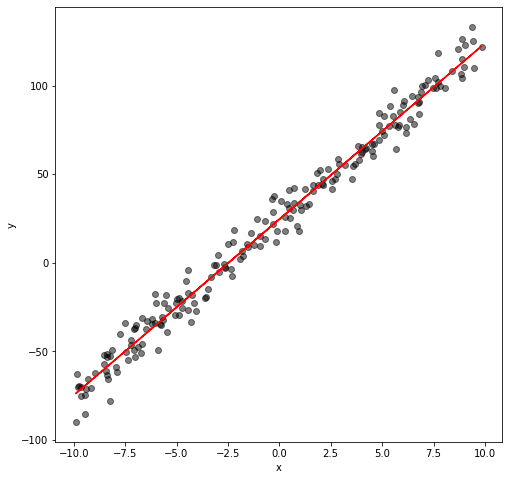

In [13]:
plt.figure(figsize=(8,8))
plt.scatter(x_data,y_data, alpha=0.5,c = 'black')
plt.plot(x_data,y_pred, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### git commit

In [0]:
!git add .
!git commit -m "Assignment03 : 2. "
!git push origin develop